✅ Archivo guardado en ../../data/ventas_limpio2.csv


C:\Users\mxalvaro\AppData\Local\Temp\ipykernel_1900\1011501516.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


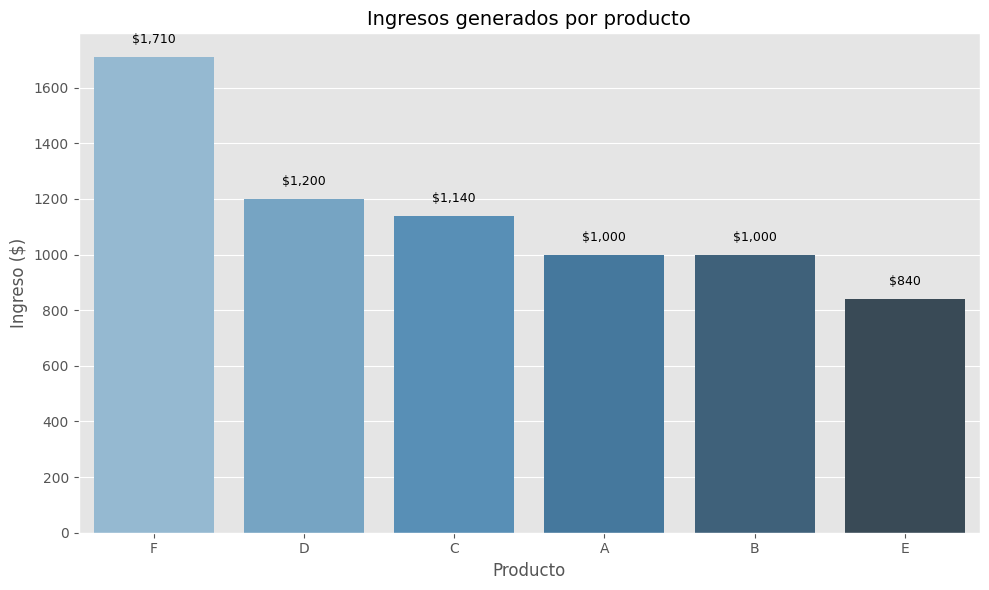

C:\Users\mxalvaro\AppData\Local\Temp\ipykernel_1900\1011501516.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='producto', y='cantidad', data=ventas_ordenado, palette='Greens_d')


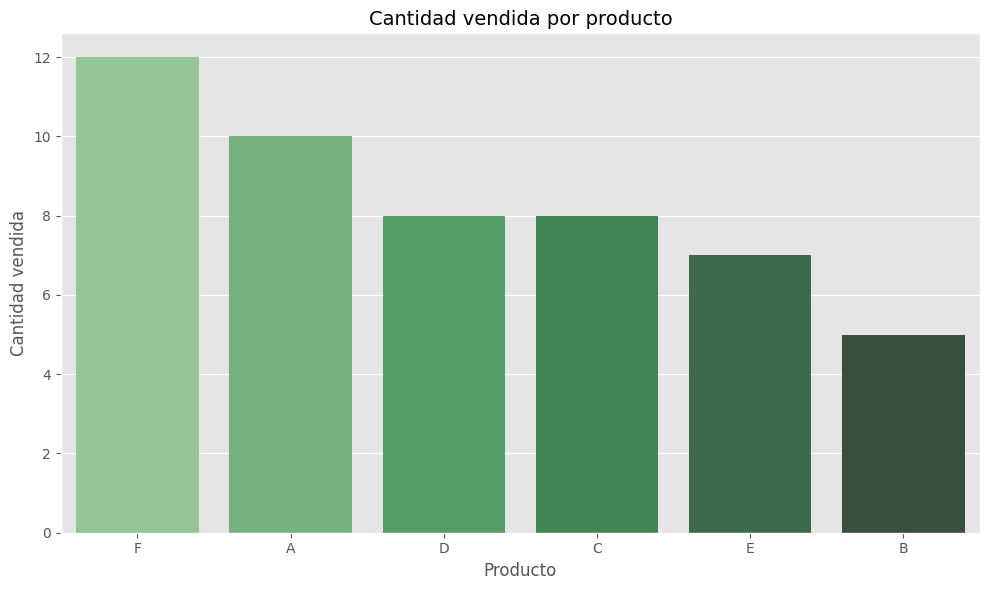

In [1]:
'''Creación de DataFrame con fechas y valores faltantes

Tratamiento de NaN con media y mediana

Cálculo de ingreso diario

Filtrado por fechas

Ordenamiento por cantidad

Exportación del DataFrame limpio a un CSV en la carpeta data/'''


# Day 05 - Refuerzo y nuevos conceptos avanzados con Pandas 🧠📊

import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1. Crear DataFrame base
# -------------------------------
datos = {
    'producto': ['A', 'B', 'C', 'D', 'E', 'F'],
    'precio': [100, 200, np.nan, 150, 120, np.nan],
    'cantidad': [10, 5, 8, np.nan, 7, 12],
    'fecha_venta': [
        '2024-01-01', '2024-01-03', '2024-01-03',
        '2024-01-05', '2024-01-07', '2024-01-10']
}
ventas = pd.DataFrame(datos)
ventas['fecha_venta'] = pd.to_datetime(ventas['fecha_venta'])

# -------------------------------
# 2. Rellenar valores faltantes
# -------------------------------
ventas_filled = ventas.fillna({
    'precio': ventas['precio'].mean(),
    'cantidad': ventas['cantidad'].median()
})

# -------------------------------
# 3. Calcular ingresos
# -------------------------------
ventas_filled['ingreso'] = ventas_filled['precio'] * ventas_filled['cantidad']

# -------------------------------
# 4. Guardar copia para gráficas
# -------------------------------
ventas_grafica = ventas_filled.copy()  # SIN formateo

# -------------------------------
# 5. Exportar CSV con $ formateado
# -------------------------------
ventas_filled['precio'] = ventas_filled['precio'].apply(lambda x: f"${x:.2f}")
ventas_filled['ingreso'] = ventas_filled['ingreso'].apply(lambda x: f"${x:.2f}")
ventas_ordenado = ventas_filled.sort_values(by='cantidad', ascending=False)
ventas_ordenado.to_csv("../../data/ventas_limpio2.csv", index=False)
print("✅ Archivo guardado en ../../data/ventas_limpio2.csv")

# -------------------------------
# 6. Gráfica 1: Ingreso por producto
# -------------------------------
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
ventas_grafica = ventas_grafica.sort_values(by='ingreso', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    x='producto',
    y='ingreso',
    data=ventas_grafica,
    palette='Blues_d'
)

plt.title("Ingresos generados por producto", fontsize=14)
plt.xlabel("Producto")
plt.ylabel("Ingreso ($)")

# Mostrar valores sobre cada barra
for i, row in enumerate(ventas_grafica.itertuples()):
    plt.text(i, row.ingreso + 50, f"${row.ingreso:,.0f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# -------------------------------
# 7. Gráfica 2: Cantidad vendida por producto
# -------------------------------
ventas_ordenado = ventas_grafica.sort_values(by='cantidad', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='producto', y='cantidad', data=ventas_ordenado, palette='Greens_d')

plt.title("Cantidad vendida por producto", fontsize=14)
plt.xlabel("Producto")
plt.ylabel("Cantidad vendida")
plt.tight_layout()
plt.show()